# Project M2 - Cell Type Classification with Morphology features
### The objective of this project is to classify two cell types (spiny/aspiny) according to their Morphology features using both logistic regression and neural network.
#### The data set is downloaded from the __[Allen Institute data base](http://alleninstitute.github.io/AllenSDK/_static/examples/nb/cell_types.html#Computing-Electrophysiology-Features)__ and is already saved in the file "MorphFeatures.csv".
#### Train the classifiers similarly to Project M1 using only morphology featrues. Then try to combine them with electrophysiology features to see how that would change the accuracy.

## Getting started with the Allen's data set
Use python library Pandas to read the csv file. The data set is now stored in Pandas dataframe.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("MorphFeatures.csv",index_col=0)
print(df.shape)
df.head(5) #show some lines on the data from the first record.

(670, 31)


,average_bifurcation_angle_local,average_bifurcation_angle_remote,average_contraction,average_diameter,average_fragmentation,average_parent_daughter_ratio,hausdorff_dimension,id,max_branch_order,max_euclidean_distance,...,scale_factor_y,scale_factor_z,soma_surface,specimen_id,superseded,tags,total_length,total_surface,total_volume,dendrite_type
0,82.727781,NaN,0.864267,0.345092,20.723077,0.964510,NaN,491119743,6.0,99.779724,...,0.1144,0.28,435.740270,478107198,False,3D Neuron Reconstruction morphology,1666.082926,1803.875644,167.343086,aspiny
1,82.506680,NaN,0.903890,0.634047,105.277778,0.862183,NaN,546781359,3.0,432.383110,...,0.1144,0.28,1446.587725,502367941,False,3D Neuron Reconstruction morphology,2277.259374,4543.139073,921.571895,spiny
2,77.536678,NaN,0.863104,0.417929,73.666667,0.926633,NaN,537042261,6.0,373.630444,...,0.1144,0.28,287.118123,515771244,False,3D Neuron Reconstruction morphology,3589.339062,4704.910407,582.285423,spiny
3,76.583222,NaN,0.900537,0.400396,95.979167,0.942049,NaN,689123605,11.0,943.382549,...,0.1144,0.28,180.994813,561435279,False,3D Neuron Reconstruction morphology,5416.228778,6814.933290,740.722806,spiny
4,72.019250,NaN,0.873518,0.227626,47.535714,1.000000,NaN,657879305,5.0,186.218009,...,0.1144,0.28,55.055236,591268268,False,3D Neuron Reconstruction morphology,1659.465869,1185.773462,69.144146,aspiny


The cell type is determined by the dendrite type in the last column of the data set. Ignore the samples of minority type called "sparsely spiny".

In [2]:
df.dropna(axis=1,inplace=True) # Drop columns with Nan values
df = df.drop_duplicates(subset=['specimen_id']) # drop duplicated of specimen_id

# Get rid of sparsely spiny cells
df = df[df.dendrite_type!='sparsely spiny'] #keep all the data that 'dendrite_type' is not 'sparsely spiny'
print(df.shape)
print(df.columns)
df.head(5)

(619, 29)
Index(['average_bifurcation_angle_local', 'average_contraction',
       'average_diameter', 'average_fragmentation',
       'average_parent_daughter_ratio', 'id', 'max_branch_order',
       'max_euclidean_distance', 'max_path_distance',
       'neuron_reconstruction_type', 'number_bifurcations', 'number_branches',
       'number_nodes', 'number_stems', 'number_tips', 'overall_depth',
       'overall_height', 'overall_width', 'scale_factor_x', 'scale_factor_y',
       'scale_factor_z', 'soma_surface', 'specimen_id', 'superseded', 'tags',
       'total_length', 'total_surface', 'total_volume', 'dendrite_type'],
      dtype='object')


,average_bifurcation_angle_local,average_contraction,average_diameter,average_fragmentation,average_parent_daughter_ratio,id,max_branch_order,max_euclidean_distance,max_path_distance,neuron_reconstruction_type,...,scale_factor_y,scale_factor_z,soma_surface,specimen_id,superseded,tags,total_length,total_surface,total_volume,dendrite_type
0,82.727781,0.864267,0.345092,20.723077,0.964510,491119743,6.0,99.779724,126.593790,dendrite-only,...,0.1144,0.28,435.740270,478107198,False,3D Neuron Reconstruction morphology,1666.082926,1803.875644,167.343086,aspiny
1,82.506680,0.903890,0.634047,105.277778,0.862183,546781359,3.0,432.383110,496.831994,dendrite-only,...,0.1144,0.28,1446.587725,502367941,False,3D Neuron Reconstruction morphology,2277.259374,4543.139073,921.571895,spiny
2,77.536678,0.863104,0.417929,73.666667,0.926633,537042261,6.0,373.630444,436.958952,dendrite-only,...,0.1144,0.28,287.118123,515771244,False,3D Neuron Reconstruction morphology,3589.339062,4704.910407,582.285423,spiny
3,76.583222,0.900537,0.400396,95.979167,0.942049,689123605,11.0,943.382549,989.448317,full,...,0.1144,0.28,180.994813,561435279,False,3D Neuron Reconstruction morphology,5416.228778,6814.933290,740.722806,spiny
4,72.019250,0.873518,0.227626,47.535714,1.000000,657879305,5.0,186.218009,221.639502,full,...,0.1144,0.28,55.055236,591268268,False,3D Neuron Reconstruction morphology,1659.465869,1185.773462,69.144146,aspiny


## Feature Engineering

In [3]:
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df_full = df.drop(columns=['id','neuron_reconstruction_type','scale_factor_x', 'scale_factor_y','scale_factor_z','specimen_id','superseded','tags'])
print(df_full.shape)
df_full.head()

(619, 21)


,average_bifurcation_angle_local,average_contraction,average_diameter,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,...,number_stems,number_tips,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,dendrite_type
0,82.727781,0.864267,0.345092,20.723077,0.964510,6.0,99.779724,126.593790,33,73,...,7,40,51.4886,140.506829,136.267522,435.740270,1666.082926,1803.875644,167.343086,aspiny
1,82.506680,0.903890,0.634047,105.277778,0.862183,3.0,432.383110,496.831994,9,23,...,5,14,92.6671,566.701220,370.170045,1446.587725,2277.259374,4543.139073,921.571895,spiny
2,77.536678,0.863104,0.417929,73.666667,0.926633,6.0,373.630444,436.958952,21,46,...,4,25,65.4696,425.897625,381.015114,287.118123,3589.339062,4704.910407,582.285423,spiny
3,76.583222,0.900537,0.400396,95.979167,0.942049,11.0,943.382549,989.448317,24,52,...,4,28,99.9139,1217.694976,524.550156,180.994813,5416.228778,6814.933290,740.722806,spiny
4,72.019250,0.873518,0.227626,47.535714,1.000000,5.0,186.218009,221.639502,14,32,...,4,18,54.3718,172.075941,261.459057,55.055236,1659.465869,1185.773462,69.144146,aspiny


In [4]:
X = abs(df_full.iloc[:,:-1]) # Need to take absolute value for SelectKBest to work
y = df_full.iloc[:,-1]       # iloc Purely integer-location based indexing for selection by position.

In [5]:
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_full.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(20,'Score'))  #print 20 best features

                              Specs          Score
18                    total_surface  539939.690284
17                     total_length  264251.289979
10                     number_nodes  220597.718099
19                     total_volume  115805.409932
7                 max_path_distance   30418.233712
6            max_euclidean_distance   27774.577274
14                   overall_height   23066.856685
9                   number_branches    2410.349432
15                    overall_width    2214.133645
13                    overall_depth    1994.393610
12                      number_tips    1213.162125
8               number_bifurcations    1201.211153
16                     soma_surface     905.144986
5                  max_branch_order     556.265637
11                     number_stems      64.412472
3             average_fragmentation      55.236331
0   average_bifurcation_angle_local      16.120053
2                  average_diameter       0.834203
4     average_parent_daughter_r

In [6]:
pick_feats = list(featureScores.nlargest(5,'Score').Specs) # make a list of the ten best features
pick_feats.append('dendrite_type') # add dendrite_type to the list

df_small = df[pick_feats] # Make a new DataFrame with our selected features
df_small.head(5)

,total_surface,total_length,number_nodes,total_volume,max_path_distance,dendrite_type
0,1803.875644,1666.082926,1470,167.343086,126.593790,aspiny
1,4543.139073,2277.259374,2011,921.571895,496.831994,spiny
2,4704.910407,3589.339062,3137,582.285423,436.958952,spiny
3,6814.933290,5416.228778,4652,740.722806,989.448317,spiny
4,1185.773462,1659.465869,1406,69.144146,221.639502,aspiny


### Now you have defined the training data set and the class labels. Next train the logistic regression classifier and the neural network like in the two examples and compare the performance of these two methods.
#### Example for logistic regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, scale
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


Split the dataset into two groups for training and testing.

In [8]:
train = df_small.sample(frac=0.8,random_state=111) # random pick 80% for training
test = df_small.drop(train.index)
print(train.shape)
print(test.shape)

(495, 6)
(124, 6)


Train and test in different groups.

In [9]:
X = train.values[:,:-1] # put all columns from first to last but not including the last one in X
Y = train.values[:,-1]  # put last columns in y
x = test.values[:,:-1]  # put all columns from first to last but not including the last one in X
y = test.values[:,-1]   # put last columns in y

lb = LabelBinarizer()  # Binarize labels in a one-vs-all fashion
Y_b = lb.fit_transform(Y) # convert values in y into binary labels
y_b = lb.fit_transform(y)

log_reg = LogisticRegression(penalty="l2")
nn = MLPClassifier(random_state=123)

log_reg.fit(X,Y_b)
nn.fit(X,Y_b)

y_pred = log_reg.predict(x)  #Predict class labels for samples in X.
y_pred2 = nn.predict(x)

print("Model accuracy:", accuracy_score(y_b,y_pred))  # Calculate the accuracy comparing the predicted labels with the ground truth
print("Model accuracy:", accuracy_score(y_b,y_pred2)) #calculat accuracy again simply with the neural network model

/usr/neurotools/conda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/neurotools/conda/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy: 0.7983870967741935
Model accuracy: 0.532258064516129


### After you finish both logistic regression and neural network training on the morphology featrues, try to combine with the electrophysiology features and see how it will affect the result. You can find the corresponding cell in the electrophysiology features dataset according to the specimen_id.

In [19]:
df_ef = pd.read_csv("ElecPhyFeatures.csv",index_col=0)       # Read electrophysiology data
print(df.shape)
print(df_ef.shape)

df_ef.dropna(inplace = True)

df_cb = pd.merge(df,df_ef,how='inner',left_on='specimen_id', right_on='specimen_id',suffixes=('_mp','')) # Combine two data frames
print(df_cb.shape)

df_cb = df_cb.drop(columns='dendrite_type_mp') # dendrite_type was duplicated while merging two dataframes, drop out one of them.
print(df_cb.shape)
print(df_cb.columns)
df_cb.head(5)

df_cb.drop(columns=['id','neuron_reconstruction_type','scale_factor_x',\
                   'scale_factor_y','scale_factor_z','specimen_id','superseded','tags',\
                   'thumbnail_sweep_id','rheobase_sweep_id','id_mp'],inplace=True)

df_cb.dropna(axis=1,inplace=True)

(619, 29)
(2333, 57)
(191, 85)
(191, 84)
Index(['average_bifurcation_angle_local', 'average_contraction',
       'average_diameter', 'average_fragmentation',
       'average_parent_daughter_ratio', 'id_mp', 'max_branch_order',
       'max_euclidean_distance', 'max_path_distance',
       'neuron_reconstruction_type', 'number_bifurcations', 'number_branches',
       'number_nodes', 'number_stems', 'number_tips', 'overall_depth',
       'overall_height', 'overall_width', 'scale_factor_x', 'scale_factor_y',
       'scale_factor_z', 'soma_surface', 'specimen_id', 'superseded', 'tags',
       'total_length', 'total_surface', 'total_volume', 'adaptation',
       'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square', 'has_burst',
       'has_delay', 'has_pause', 'id', 'input_resistance_mohm', 'latency',
       'peak_t_lo

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type
10,0.044825,91.322222,-46.761876,0.223864,1.190240,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,1.806510,-50.875000,-50.989586,-76.791669,2.992793,2.817856,2.706951,-96.906250,-75.320374,spiny
15,0.542358,307.100000,9.275000,0.155347,1.085160,8.536707,1.025427,-47.000000,-46.927086,-55.093753,...,1.130500,-47.875004,-49.729168,-81.250005,2.718901,2.528137,3.060707,-95.500008,-80.050621,spiny
21,0.026335,57.290937,-2.252500,0.230118,1.220605,3.909120,1.025012,-48.718750,-49.625001,-50.287501,...,1.418688,-57.562500,-55.854167,-76.443752,3.237865,3.761957,3.683673,-98.250000,-75.684387,spiny
31,0.014082,51.684722,16.169373,0.329911,1.189230,3.006398,1.024180,-63.062504,-62.156253,-64.671879,...,1.250334,-63.156254,-62.270835,-66.820312,1.749210,1.692778,1.834847,-94.875008,-65.863571,aspiny
33,0.023807,64.810714,-44.851872,0.245966,1.232415,3.425218,1.025796,-46.687504,-46.520836,-49.987504,...,1.343680,-56.562504,-55.302086,-82.462502,4.462798,4.657636,3.995201,-99.593750,-81.016342,spiny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,0.274982,41.930000,-17.122500,0.019242,1.234580,3.249090,1.025540,-44.375004,-43.984375,-53.593752,...,1.663965,-51.875004,-70.734379,-74.378910,3.362779,3.177960,3.536790,-93.093750,-73.549843,aspiny
2309,0.018019,46.556000,-24.063126,0.264265,1.230720,3.158835,1.024907,-47.593754,-47.906250,-50.687504,...,1.790302,-55.468754,-54.468754,-75.979169,3.098713,3.095640,3.236001,-97.843750,-73.919159,spiny
2313,0.073908,84.343182,-47.029998,0.122235,1.145775,4.269355,1.024991,-44.812500,-43.031254,-51.281252,...,1.176302,-50.250000,-47.187504,-66.875002,2.926944,2.735495,3.048108,-89.281250,-66.116722,spiny
2320,-0.003253,82.542727,1.456875,0.190148,1.363670,3.236892,1.025772,-53.156254,-50.729169,-51.041668,...,1.604378,-60.562504,-57.697920,-78.447922,3.831988,3.973803,3.584971,-98.937508,-77.520386,spiny


split into X and Y again, since you are using the combination of data sets

In [11]:
df_cb.head()

,average_bifurcation_angle_local,average_contraction,average_diameter,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,...,threshold_v_short_square,trough_t_long_square,trough_t_short_square,trough_v_long_square,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type
0,82.727781,0.864267,0.345092,20.723077,0.964510,6.0,99.779724,126.593790,33,73,...,-42.656250,1.441885,1.047640,-59.812500,-66.718750,2.625872,1.909216,-77.718758,-63.952812,aspiny
1,82.506680,0.903890,0.634047,105.277778,0.862183,3.0,432.383110,496.831994,9,23,...,-43.468752,1.575860,1.114696,-58.125004,-66.443753,4.322536,3.659369,-98.937508,-66.457214,spiny
2,77.536678,0.863104,0.417929,73.666667,0.926633,6.0,373.630444,436.958952,21,46,...,-44.200003,1.458660,1.236256,-56.000000,-69.356253,5.076478,3.992479,-85.312500,-68.378876,spiny
3,76.583222,0.900537,0.400396,95.979167,0.942049,11.0,943.382549,989.448317,24,52,...,-44.781251,1.074680,1.096650,-55.031250,-63.726564,3.445772,3.118708,-83.625000,-62.545727,spiny
4,72.019250,0.873518,0.227626,47.535714,1.000000,5.0,186.218009,221.639502,14,32,...,-44.671878,1.027520,1.377193,-60.656254,-72.192708,1.255817,1.371654,-85.093750,-71.524811,aspiny


In [20]:
X =abs(df_cb.iloc[:,:-1])
y =df_cb.iloc[:,-1]

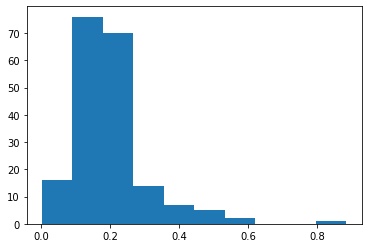

In [21]:
import matplotlib.pyplot as plt
plt.hist(df_cb['f_i_curve_slope'])
plt.show()

In [22]:
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_full.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(20,'Score'))  #print 20 best features

                     Specs         Score
18           total_surface  16186.511355
17            total_length  14440.026037
10            number_nodes  11889.753251
7        max_path_distance   4463.092956
6   max_euclidean_distance   3920.983662
14          overall_height   3282.224937
54                     NaN   2833.535734
19            total_volume   2283.656756
33                     NaN    942.551870
42                     NaN    413.141097
13           overall_depth    398.310723
9          number_branches    202.101464
21                     NaN    199.504679
15           overall_width    180.022676
39                     NaN    116.556547
12             number_tips    113.163248
38                     NaN     94.874014
8      number_bifurcations     88.650239
40                     NaN     65.866401
5         max_branch_order     62.024977


In [15]:
pick_feats = list(featureScores.nlargest(5,'Score').Specs) # make a list of the ten best features
pick_feats.append('dendrite_type') # add dendrite_type to the list

df_small = df[pick_feats] # Make a new DataFrame with our selected features
df_small.head(5)

KeyError: '[nan] not in index'

Once you get the new training set and class labels, then you can apply logistic regression, neural network, and Random Forest classifier model to the new combined data

Questions for Ben:
Variables for new run of the logistic regression and nn model 
Accuracy score change?



Now apply RandomForestClassifier to compare it to Logistic Regression and the NN Model

from sklearn.ensemble import RandomForestClassifer

#Create the random forest classifier 

rand_for = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=seed)


Train and test random forest classifier 

rand_for.fit(X_train,y_train)
y_pred = rand_for.predict(X_test)

print('Model accuracy:', accuracy_score(y_test,y_pred))

ANALYSIS:
Compared to logistic regression and neural networks, the random forest classifier...